<h1>Курсовая работа по численным методам математической физики</h1>

<p>Разработать программу расчета на промежутке времени $0 < t \leq T$ малых поперечных колебаний тонкой однородной струны с жестко закрепленными концами $x=0$ и $x=l$. Колебания возбуждаются непрерывно распределенной по струне и перпендикулярной к ней силой плотностью</p>
$$\varphi(x,t) = \alpha(x)\sin\omega t, 0 \leq x \leq l, 0 \leq t \leq T$$

<p>Реакция окружающей среды пренебрежимо мала.</p>
<p>Начальные скорости точек струны равны нулю. Линейная плотность тсруны и величина натяжения, возникающего в струне в процессе колебаний равны $\rho$ и $\eta$ соответственно.</p>

<p>Для численного решения описанной задачи математической физики применить метод конечных разностей.</p>

<p>Для проведения расчетов использовать простейшую явную конечно-разностную схему.</p>

<p>Для получения аналитической формы решения описанной задачи математической физики применить метод разделения переменных.</p>

In [1]:
from math import sin
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 20   #длина
I = 300   #количество узлов сетки
T = 60   #время
K = 1000   #количество узлов по времени
hx = L/(I-1) #шаг сетки по переменной x
ht = T/(K-1) #шаг сетки по переменной t


In [3]:
ro = 2
eta = 1
w = 2
a2 = (eta/ro)

In [4]:
print(a2*(ht**2)/(hx**2))

0.40311031752473203


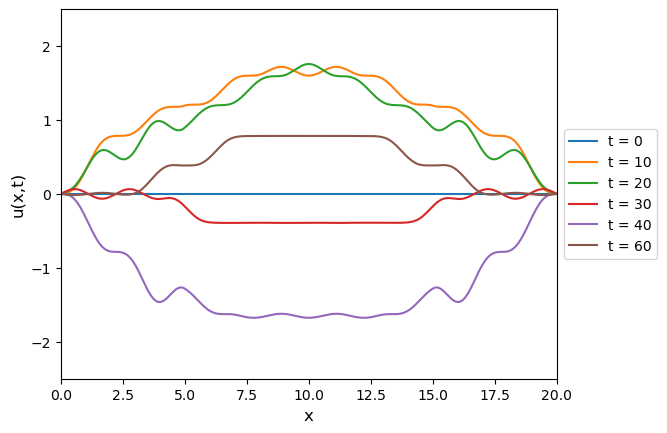

In [5]:
import numpy as np
def pp_ss(T):
    def alpha(x):
        if x >= 0.25*L and x <= 0.75*L:
            return 1
        else:
            return 0
        
    def phi(x,t):
        return alpha(x)*sin(w*t)
    u = np.zeros((K, I))
    ht = T/(K-1) #шаг сетки по переменной t
    
    gamma = (ht**2 * a2) / (hx ** 2)
    
    for k in range(1, K-1):
        for i in range(1, I-1):
            u[k+1][i] = gamma*u[k][i+1] + 2*(1-gamma)*u[k][i] + gamma*u[k][i-1] - u[k-1][i] + phi(hx*i,ht*k)*(ht**2)/ro
    
    return u[-1]



lx = []
for i in range(I):
    lx.append(i*(L/(I-1)))
l2 = pp_ss(0)
l3 = pp_ss(10)
l4 = pp_ss(20)
l5 = pp_ss(30)
l6 = pp_ss(40)
l7 = pp_ss(60)
plt.axis([0,20,-2.5,2.5])
plt.plot(lx, l2, label='t = 0')  
plt.plot(lx, l3, label='t = 10')  
plt.plot(lx, l4, label='t = 20')  
plt.plot(lx, l5, label='t = 30')  
plt.plot(lx, l6, label='t = 40')  
plt.plot(lx, l7, label='t = 60')  

plt.xlabel("x", fontsize='large')
plt.ylabel("u(x,t)", fontsize='large')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

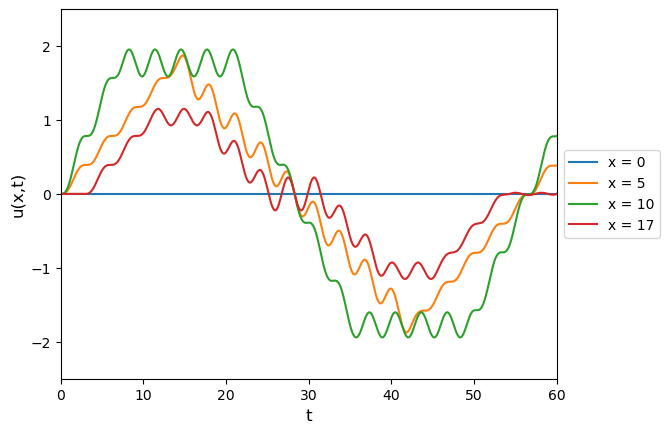

In [6]:
import numpy as np
T = 60
def ppp_sss(XX):
    def alpha(x):
        if x >= 0.25*L and x <= 0.75*L:
            return 1
        else:
            return 0
        
    def phi(x,t):
        return alpha(x)*sin(w*t)
    u = np.zeros((K, I))
    ht = T/(K-1) #шаг сетки по переменной t
    
    gamma = (ht**2 * a2) / (hx ** 2)
    
    for k in range(1, K-1):
        for i in range(1, I-1):
            u[k+1][i] = gamma*u[k][i+1] + 2*(1-gamma)*u[k][i] + gamma*u[k][i-1] - u[k-1][i] + phi(hx*i,ht*k)*(ht**2)/ro
    
    p = int(XX * I / L)
    
    return u[:,p]



lxx = []
for i in range(K):
    lxx.append(i*(T/(K-1)))

l0 = ppp_sss(0)
l1 = ppp_sss(5)
l2 = ppp_sss(10)
l3 = ppp_sss(17)

plt.axis([0,T,-2.5,2.5])
plt.plot(lxx, l0, label='x = 0')
plt.plot(lxx, l1, label='x = 5')  
plt.plot(lxx, l2, label='x = 10')  
plt.plot(lxx, l3, label='x = 17') 


plt.xlabel("t", fontsize='large')
plt.ylabel("u(x,t)", fontsize='large')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

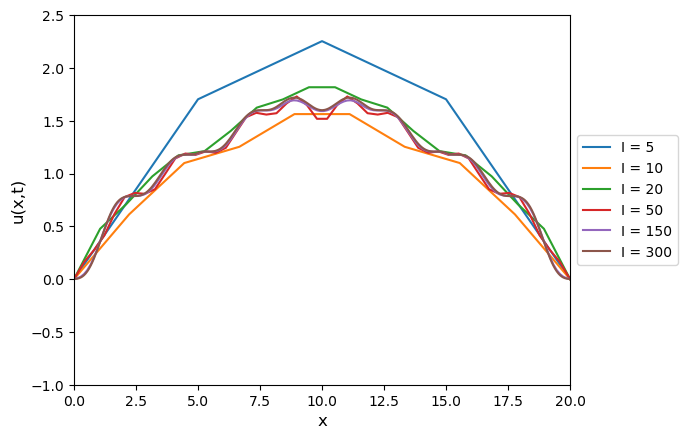

In [7]:
import numpy as np
def pp_ss_2(T, I):
    I = I
    def alpha(x):
        if x >= 0.25*L and x <= 0.75*L:
            return 1
        else:
            return 0
        
    def phi(x,t):
        return alpha(x)*sin(w*t)
    u = np.zeros((K, I))
    
    hx = L/(I-1) #шаг сетки по переменной x
    ht = T/(K-1) #шаг сетки по переменной t
    
    gamma = (ht**2 * a2) / (hx ** 2)
    
    for k in range(1, K-1):
        for i in range(1, I-1):
            u[k+1][i] = gamma*u[k][i+1] + 2*(1-gamma)*u[k][i] + gamma*u[k][i-1] - u[k-1][i] + phi(hx*i,ht*k)*(ht**2)/ro
    
    return u[-1]


def lx_2(I):
    lx2 = []
    I = I
    for i in range(I):
        lx2.append(i*(L/(I-1)))
    return lx2
    
l2 = pp_ss_2(10, 5)
lx2 = lx_2(5)
l3 = pp_ss_2(10, 10)
lx3 = lx_2(10)
l4 = pp_ss_2(10, 20)
lx4 = lx_2(20)
l5 = pp_ss_2(10, 50)
lx5 = lx_2(50)
l6 = pp_ss_2(10, 150)
lx6 = lx_2(150)
l7 = pp_ss_2(10, 300)
lx7 = lx_2(300)
plt.axis([0,20,-1,2.5])
plt.plot(lx2, l2, label='I = 5')  
plt.plot(lx3, l3, label='I = 10')  
plt.plot(lx4, l4, label='I = 20')  
plt.plot(lx5, l5, label='I = 50')  
plt.plot(lx6, l6, label='I = 150')  
plt.plot(lx7, l7, label='I = 300')  

plt.xlabel("x", fontsize='large')
plt.ylabel("u(x,t)", fontsize='large')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

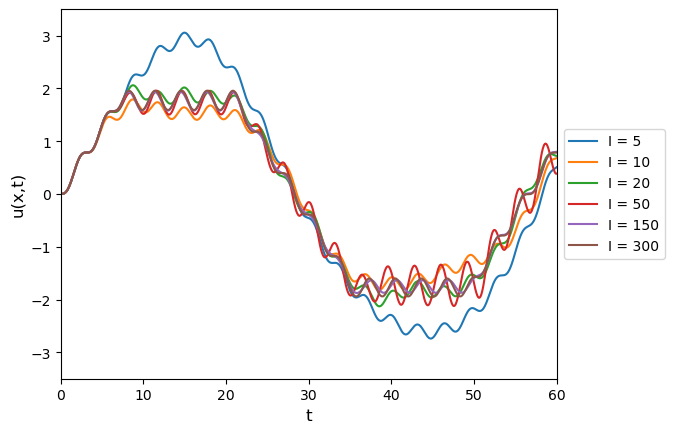

In [8]:
import numpy as np
T = 60
K = 1000
def ppp_sss_2(XX, I, K):
    I = I
    K = K
    def alpha(x):
        if x >= 0.25*L and x <= 0.75*L:
            return 1
        else:
            return 0
        
    def phi(x,t):
        return alpha(x)*sin(w*t)
    u = np.zeros((K, I))
    
    hx = L/(I-1) #шаг сетки по переменной x
    ht = T/(K-1) #шаг сетки по переменной t
    
    gamma = (ht**2 * a2) / (hx ** 2)
    
    for k in range(1, K-1):
        for i in range(1, I-1):
            u[k+1][i] = gamma*u[k][i+1] + 2*(1-gamma)*u[k][i] + gamma*u[k][i-1] - u[k-1][i] + phi(hx*i,ht*k)*(ht**2)/ro
    
    p = int(XX * I / L)
    
    return u[:,p]



def lx_3(K):
    lx2 = []
    K = K
    for i in range(K):
        lx2.append(i*(T/(K-1)))
    return lx2
    
l2 = ppp_sss_2(10, 5, 1000)
lx2 = lx_3(1000)
l3 = ppp_sss_2(10, 10, 1000)
lx3 = lx_3(1000)
l4 = ppp_sss_2(10, 20, 1000)
lx4 = lx_3(1000)
l5 = ppp_sss_2(10, 50, 1000)
lx5 = lx_3(1000)
l6 = ppp_sss_2(10, 150, 1000)
lx6 = lx_3(1000)
l7 = ppp_sss_2(10, 300, 1000)
lx7 = lx_3(1000)
plt.axis([0,T,-3.5,3.5])
plt.plot(lx2, l2, label='I = 5')  
plt.plot(lx3, l3, label='I = 10')  
plt.plot(lx4, l4, label='I = 20')  
plt.plot(lx5, l5, label='I = 50')  
plt.plot(lx6, l6, label='I = 150')  
plt.plot(lx7, l7, label='I = 300')  

plt.xlabel("t", fontsize='large')
plt.ylabel("u(x,t)", fontsize='large')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()